# Deep Learning Report

Este reporte del proyecto **Deep learning** examina el uso de un modelo de red neuronal LSTM para predecir precios de acciones. Se detalla la configuración del modelo, su optimización, y la efectividad medida mediante backtesting. 

El propósito es evaluar la capacidad de las LSTM para guiar decisiones de trading algorítmico en mercados financieros, enfocándose en cómo estos modelos avanzados pueden optimizar estrategias de inversión y gestión de riesgos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import tensorflow as tf 
import ssl

#importar mse
from sklearn.metrics import mean_squared_error
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [2]:
random=2345
ssl._create_default_https_context = ssl._create_unverified_context

data = pd.read_csv("https://raw.githubusercontent.com/Rerris/Technical_Analysis_Proyect/9a7d477bbed852e752101fe85ac928200ae7ebd5/data/aapl_1d_test.csv")
data.dropna(inplace=True)

<Axes: >

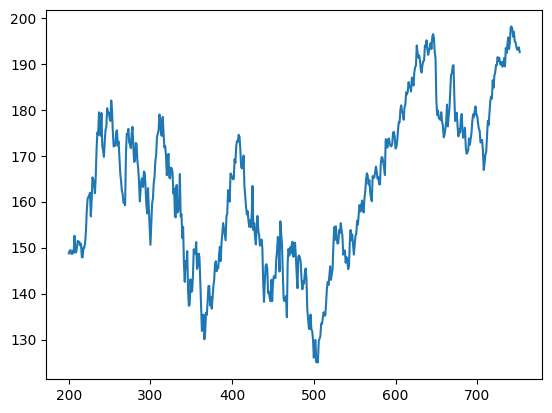

In [ ]:
data["Close"].plot()

## **Modelos utilizados dentro de las funciones**
Los modelos utilizados fueron ("LSTM", "Mean squared error","RootMeanSquaredError")

### **¿Que es un modelo LSTM?**
Un modelo LSTM (Long Short-Term Memory) es una variante avanzada de las redes neuronales recurrentes, diseñada para captar dependencias a largo plazo en datos secuenciales. Este tipo de modelo es particularmente efectivo para superar el problema de la desaparición del gradiente que afecta a las RNN tradicionales, lo cual lo hace ideal para aplicaciones como el procesamiento de lenguaje natural y la predicción de series temporales. La estructura de una LSTM se compone de unidades que incluyen puertas específicas—de olvido, de entrada y de salida—que regulan el flujo de información, permitiendo que la red retenga o descarte información de manera selectiva a lo largo del tiempo.


**Modelo LSTM:** Se construye un modelo secuencial que incluye:

Una capa LSTM con 256 unidades que devuelve secuencias, para poder apilar otra capa LSTM encima.

Una segunda capa LSTM con 128 unidades.

Una capa densa con una unidad, que se utiliza para la predicción de valores continuos (en este caso, precios).

Optimización y pérdida: El modelo utiliza el optimizador Adam y la función de pérdida MeanSquaredError. También se monitorizan las métricas durante el entrenamiento, incluyendo RootMeanSquaredError para evaluar la precisión de las predicciones del modelo.

Entrenamiento: Se entrena el modelo con un conjunto de datos que representa precios de cierre ajustados de acciones, estructurado para predecir el precio del día siguiente basado en los 30 días anteriores. Se utiliza la técnica de validación cruzada y un callback de EarlyStopping para evitar el sobreajuste, deteniendo el entrenamiento si el valor de la pérdida no mejora tras un número determinado de épocas.

Predicciones: Se realizan predicciones tanto para el conjunto de entrenamiento como para el de prueba, y estas predicciones se visualizan comparando los precios predichos frente a los reales.

Visualización de resultados: Se utilizan gráficos, específicamente gráficos de candelabros y líneas, para visualizar tanto los datos originales como los resultados del modelo y el rendimiento del portafolio sobre tiempo, indicando acciones de compra, venta o retención basadas en las predicciones del modelo.

1. La primera capa LSTM tiene **256 neuronas**.
2. La segunda capa LSTM tiene **128 neuronas**.

Estas neuronas son las unidades de procesamiento dentro de cada capa LSTM, responsables de aprender y mantener la información a través del tiempo en las secuencias de datos, lo cual es fundamental para modelar series temporales como los precios de las acciones.

In [ ]:
data

,Close,Closet-1,Closet-2,RSI,macd,macd_signal,Ema 13,Ema 48,Ema 200,Long,Short
200,148.76,149.26,149.48,60.064144,-0.387048,-1.214695,144.366068,145.033400,138.376440,False,True
201,149.26,149.48,148.69,61.062292,0.029030,-0.965950,145.065201,145.205915,138.484734,False,True
202,149.48,148.69,148.64,61.518042,0.372237,-0.698313,145.695887,145.380367,138.594140,False,True
203,148.69,148.64,149.32,58.854117,0.573869,-0.443876,146.123617,145.515454,138.694596,False,True
204,148.64,149.32,148.85,58.680919,0.721314,-0.210838,146.483100,145.642987,138.793555,False,True
...,...,...,...,...,...,...,...,...,...,...,...
748,193.60,193.05,193.15,54.609704,2.636316,3.236689,194.600511,188.472310,177.514883,False,False
749,193.05,193.15,193.58,53.026881,2.306308,3.050613,194.379009,188.659155,177.669462,False,False
750,193.15,193.58,192.53,53.291960,2.029448,2.846380,194.203437,188.842454,177.823497,False,False
751,193.58,192.53,NaN,54.481471,1.823710,2.641846,194.114374,189.035824,177.980278,False,False


AQUI A ABAJO

In [ ]:
# To create values of  (X) y label (Y)
X = pd.DataFrame()
X["Pt"] = data.Close
for i in range(1, 31):  #This code creates the columns that represent the previous days desired
    X[f"Pt_{i}"] = data.Close.shift(i)
Y = data.Close.shift(-1)

In [ ]:

X = X.iloc[30:-1]
Y = Y.iloc[30:-1]

# Split train and test
split = int(0.8 * len(X))
X_train, X_test = X.iloc[:split], X.iloc[split:]
Y_train, Y_test = Y.iloc[:split], Y.iloc[split:]

In [ ]:
# Build the LSTM model
model = Sequential([
    LSTM(units=256, return_sequences=True, input_shape=(31, 1)),
    LSTM(units=128),
    Dense(units=1)
])



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer=Adam(), loss= MeanSquaredError(), metrics=[RootMeanSquaredError()])


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, Y_train, epochs=100, validation_split=0.2, batch_size=64, callbacks=[early_stopping])

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 48651.0938 - root_mean_squared_error: 220.5616 - val_loss: 73154.6875 - val_root_mean_squared_error: 278.0877
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 44752.2930 - root_mean_squared_error: 211.4671 - val_loss: 70402.6641 - val_root_mean_squared_error: 272.9217
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 43917.8281 - root_mean_squared_error: 209.5353 - val_loss: 67919.6484 - val_root_mean_squared_error: 268.1695
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 44923.2695 - root_mean_squared_error: 211.8262 - val_loss: 65620.2969 - val_root_mean_squared_error: 263.6870
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 41230.7656 - root_mean_squared_error: 202.9977 - val_loss: 63482.0508 - val_root_mean_squared_error: 259.4438
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 40364.1406 - root_mean_squared_error: 200.8923 - val_loss: 61480.5078 - val_root_mean_squa

In [ ]:
# Make predictions
train_predictions = model.predict(X_train.values.reshape(-1, 31, 1))
test_predictions = model.predict(X_test.values.reshape(-1, 31, 1))


132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [ ]:
# Plotting the results
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])
predicted_prices = np.concatenate([train_predictions, test_predictions])

# Prediction
fig.add_trace(go.Scatter(x=data.index, y=predicted_prices.flatten(), mode='lines', name='Predicted Price',line=dict(color='blue')))

# Labels
fig.update_layout(title='Stock Price Prediction using LSTM',
                   xaxis_title='Time',
                   yaxis_title='Stock Price',
                   showlegend=True,
                   legend=dict(x=0, y=1))

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()


In [ ]:
data_test=pd.read_csv('https://raw.githubusercontent.com/Rerris/Technical_Analysis_Proyect/9a7d477bbed852e752101fe85ac928200ae7ebd5/data/aapl_1d_test.csv')
data_test.dropna(inplace=True)

In [ ]:
X=pd.DataFrame()
X["Pt"] = data_test.Close
for i in range(1, 31):  # Generar características para desplazamientos de 1 a 30 días
    X[f"Pt_{i}"] = data_test.Close.shift(i)
Y = data_test.Close.shift(-1)
X_test=X

In [ ]:
Y=data_test.Close.shift(-1)
Y.head(10)

0    131.01
1    126.60
2    130.92
3    132.05
4    128.98
5    128.80
6    130.89
7    128.91
8    127.14
9    127.83
Name: Close, dtype: float64

In [ ]:
test_predictions = model.predict(X_test.values.reshape(-1, 31, 1))

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [ ]:
# Plot
fig = go.Figure(data=[go.Candlestick(x=data_test.index,
                open=data_test['Open'],
                high=data_test['High'],
                low=data_test['Low'],
                close=data_test['Close'])])

# Prediction
fig.add_trace(go.Scatter(x=data_test.index, y=test_predictions.flatten(), mode='lines', name='Predicted Price',line=dict(color='blue')))

# Labels
fig.update_layout(title='Stock Price Prediction using LSTM',
                   xaxis_title='Time',
                   yaxis_title='Stock Price',
                   showlegend=True,
                   legend=dict(x=0, y=1))

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()


In [ ]:
from tensorflow.keras import models
# Save the Keras model
models.save_model(model, 'model.keras')



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('model.keras')

# Initialize the portfolio
portfolio_value = 100000  # Initial portfolio value
cash = portfolio_value
stock = 0
history = []  # To keep track of buy/sell/hold actions

# Define other necessary variables for backtesting
time_steps = 1
take_profit = 1.01
stop_loss = 0.99
buying_price = 0  # Initialize the buying price
action = 'Hold'  # Initialize the action

# Perform predictions and execute backtesting
for i in range(len(X_test) - time_steps):
    # Prepare the test data and reshape it
    X_test_reshaped = X_test.iloc[i:i+time_steps].values.reshape(-1, 31, 1)
    
    # Predict the price of the next day
    predicted_price = model.predict(X_test_reshaped)[0][0]
    
    # Get the actual price of the next day
    actual_price = X_test.iloc[i+time_steps, 0]
    
    # Decide to buy, sell, or hold
    if predicted_price > actual_price:  # If the model predicts that the price will go up
        if cash > 0:
            # Buy only 5% of the portfolio value
            buy_value = min(cash, portfolio_value * 0.05)
            stock += buy_value / actual_price
            cash -= buy_value
            action = 'Buy'
            buying_price = actual_price
    elif predicted_price < actual_price or actual_price >= buying_price * take_profit or actual_price <= buying_price * stop_loss:  # If the model predicts that the price will go down or the take profit or stop loss is reached
        if stock > 0:
            # Sell only 5% of the portfolio value
            sell_value = min(stock * actual_price, portfolio_value * 0.05)
            stock -= sell_value / actual_price
            cash += sell_value
            action = 'Sell'
    else:
        action = 'Hold'
    
    # Calculate the portfolio value
    portfolio_value = cash + stock * actual_price
    
    # Save the action in the history
    history.append({
        'Day': i,
        'Action': action,
        'Cash': cash,
        'Stock': stock,
        'Portfolio Value': portfolio_value
    })

# Convert the history into a DataFrame
df_history = pd.DataFrame(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━

In [ ]:
def optimize(take_profit, stop_loss):
    # Initialize the portfolio
    portfolio_value = 100000  
    cash = portfolio_value
    stock = 0
    history = []  

    # Variables for backtesting
    time_steps = 1
    buying_price = 0  # Initialize the buying price
    action = 'Hold'  # Initialize the action

    # Perform predictions and execute backtesting
    for i in range(len(X_test) - time_steps):
        # Prepare the test data 
        X_test_reshaped = X_test.iloc[i:i+time_steps].values.reshape(-1, 31, 1)

        # Predict the price 
        predicted_price = model.predict(X_test_reshaped)[0][0]

        # Get price
        actual_price = X_test.iloc[i+time_steps, 0]

        # Buy, sell, or hold
        if predicted_price > actual_price: 
            if cash > 0:
                # Buy only 5% of the portfolio value
                buy_value = min(cash, portfolio_value * 0.05)
                stock += buy_value / actual_price
                cash -= buy_value
                action = 'Buy'
                buying_price = actual_price
        elif predicted_price < actual_price or actual_price >= buying_price * take_profit or actual_price <= buying_price * stop_loss:  # If the model predicts that the price will go down or the take profit or stop loss is reached
            if stock > 0:
                # Sell only 5% of the portfolio value
                sell_value = min(stock * actual_price, portfolio_value * 0.05)
                stock -= sell_value / actual_price
                cash += sell_value
                action = 'Sell'
        else:
            action = 'Hold'

        # Calculate portfolio value
        portfolio_value = cash + stock * actual_price

        # Save
        history.append({
            'Day': i,
            'Action': action,
            'Cash': cash,
            'Stock': stock,
            'Portfolio Value': portfolio_value
        })

    # Convert the history into a DataFrame
    df_history = pd.DataFrame(history)

    return df_history

df_optimized = optimize(take_profit, stop_loss)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

In [ ]:
df_history

,Day,Action,Cash,Stock,Portfolio Value
0,0,Hold,100000.000000,0.0,100000.000000
1,1,Hold,100000.000000,0.0,100000.000000
2,2,Hold,100000.000000,0.0,100000.000000
3,3,Hold,100000.000000,0.0,100000.000000
4,4,Hold,100000.000000,0.0,100000.000000
...,...,...,...,...,...
747,747,Sell,148216.268618,0.0,148216.268618
748,748,Sell,148216.268618,0.0,148216.268618
749,749,Sell,148216.268618,0.0,148216.268618
750,750,Sell,148216.268618,0.0,148216.268618


In [ ]:
# Graficar el historial de la cartera
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_history['Day'], y=df_history['Portfolio Value'], mode='lines', name='Portfolio Value', line=dict(color='blue')))
fig.update_layout(title='Portfolio Value Over Time',
                   xaxis_title='Day',
                   yaxis_title='Portfolio Value',
                   showlegend=True,
                   legend=dict(x=0, y=1))
fig.show()

## **Backtesting Para datos de un día**
Pasamos a la etapa de realizar el backtest y posteriormente probar nuestros modelos

El backtesting se realiza con una estrategia que involucra la predicción de precios futuros y la toma de decisiones de compra, venta o retención basadas en esas predicciones. Aquí está cómo se estructura el backtesting en este caso:

### Preparación de Datos
Los datos se estructuran de modo que cada entrada representa los precios de cierre de los últimos 30 días, usados para predecir el precio del día siguiente. Este enfoque permite al modelo entrenarse en patrones temporales históricos.

### División de Datos
Los datos se dividen en conjuntos de entrenamiento y prueba, donde el conjunto de entrenamiento se utiliza para ajustar el modelo y el conjunto de prueba se usa para simular la toma de decisiones en un entorno de mercado no visto.

### Entrenamiento del Modelo
El modelo se entrena con los datos de entrenamiento y se valida usando un subconjunto de estos datos para ajustar los parámetros y evitar el sobreajuste, utilizando técnicas como la parada anticipada.

### Evaluación y Estrategia de Trading
Una vez entrenado el modelo, se utilizan los datos de prueba para evaluar su rendimiento. El modelo predice los precios del día siguiente y se toman decisiones de trading:
- **Compra**: si el modelo predice un aumento en el precio.
- **Venta**: si el modelo predice una disminución en el precio o se alcanza un umbral de toma de ganancias o limitación de pérdidas.
- **Retención**: si no se cumplen las condiciones para comprar o vender.

### Medición del Rendimiento
El rendimiento del modelo se mide en términos de la precisión de las predicciones y el resultado financiero de la estrategia de trading. Se realiza un seguimiento del valor del portafolio a lo largo del tiempo, considerando las decisiones de compra y venta ejecutadas por el modelo.

### Visualización
Se visualizan los resultados del backtesting utilizando gráficos que muestran los precios reales y predichos, así como el valor del portafolio a lo largo del tiempo. Esto permite evaluar visualmente la eficacia de la estrategia de trading basada en las predicciones del modelo LSTM.

Este proceso de backtesting es crucial para validar la eficacia del modelo en condiciones similares a las reales del mercado, proporcionando una estimación de cómo podría comportarse el modelo en la implementación en vivo.

In [ ]:
from tensorflow.keras import models
# Save the Keras model
models.save_model(model, 'model.keras')



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('model.keras')

# Initialize the portfolio
portfolio_value = 100000  # Initial portfolio value
cash = portfolio_value
stock = 0
history = []  # To keep track of buy/sell/hold actions

# Define other necessary variables for backtesting
time_steps = 1
take_profit = 1.01
stop_loss = 0.99
buying_price = 0  # Initialize the buying price
action = 'Hold'  # Initialize the action

# Perform predictions and execute backtesting
for i in range(len(X_test) - time_steps):
    # Prepare the test data and reshape it
    X_test_reshaped = X_test.iloc[i:i+time_steps].values.reshape(-1, 31, 1)
    
    # Predict the price of the next day
    predicted_price = model.predict(X_test_reshaped)[0][0]
    
    # Get the actual price of the next day
    actual_price = X_test.iloc[i+time_steps, 0]
    
    # Decide to buy, sell, or hold
    if predicted_price > actual_price:  # If the model predicts that the price will go up
        if cash > 0:
            # Buy only 5% of the portfolio value
            buy_value = min(cash, portfolio_value * 0.05)
            stock += buy_value / actual_price
            cash -= buy_value
            action = 'Buy'
            buying_price = actual_price
    elif predicted_price < actual_price or actual_price >= buying_price * take_profit or actual_price <= buying_price * stop_loss:  # If the model predicts that the price will go down or the take profit or stop loss is reached
        if stock > 0:
            # Sell only 5% of the portfolio value
            sell_value = min(stock * actual_price, portfolio_value * 0.05)
            stock -= sell_value / actual_price
            cash += sell_value
            action = 'Sell'
    else:
        action = 'Hold'
    
    # Calculate the portfolio value
    portfolio_value = cash + stock * actual_price
    
    # Save the action in the history
    history.append({
        'Day': i,
        'Action': action,
        'Cash': cash,
        'Stock': stock,
        'Portfolio Value': portfolio_value
    })

# Convert the history into a DataFrame
df_history = pd.DataFrame(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━

## **Optimizacion** 
la optimización se realiza mediante el uso del algoritmo Adam, que es un optimizador basado en la estimación adaptativa de momentos de primer y segundo orden. Este método es conocido por su eficacia en diferentes tipos de modelos neuronales, especialmente en problemas con grandes volúmenes de datos y parámetros. Además, se utiliza la función de pérdida MeanSquaredError, que es adecuada para problemas de regresión como la predicción de precios. Durante el entrenamiento, también se monitorean métricas adicionales, específicamente RootMeanSquaredError, para evaluar la precisión de las predicciones del modelo.

Para evitar el sobreajuste y mejorar la convergencia del modelo, se emplea una técnica de parada anticipada (EarlyStopping). Esta técnica monitorea la pérdida de validación durante el entrenamiento y detiene el proceso si no se observan mejoras después de un número predefinido de épocas, garantizando así que el modelo conserva su capacidad de generalización.

In [ ]:
def optimize(take_profit, stop_loss):
    # Initialize the portfolio
    portfolio_value = 100000  
    cash = portfolio_value
    stock = 0
    history = []  

    # Variables for backtesting
    time_steps = 1
    buying_price = 0  # Initialize the buying price
    action = 'Hold'  # Initialize the action

    # Perform predictions and execute backtesting
    for i in range(len(X_test) - time_steps):
        # Prepare the test data 
        X_test_reshaped = X_test.iloc[i:i+time_steps].values.reshape(-1, 31, 1)

        # Predict the price 
        predicted_price = model.predict(X_test_reshaped)[0][0]

        # Get price
        actual_price = X_test.iloc[i+time_steps, 0]

        # Buy, sell, or hold
        if predicted_price > actual_price: 
            if cash > 0:
                # Buy only 5% of the portfolio value
                buy_value = min(cash, portfolio_value * 0.05)
                stock += buy_value / actual_price
                cash -= buy_value
                action = 'Buy'
                buying_price = actual_price
        elif predicted_price < actual_price or actual_price >= buying_price * take_profit or actual_price <= buying_price * stop_loss:  # If the model predicts that the price will go down or the take profit or stop loss is reached
            if stock > 0:
                # Sell only 5% of the portfolio value
                sell_value = min(stock * actual_price, portfolio_value * 0.05)
                stock -= sell_value / actual_price
                cash += sell_value
                action = 'Sell'
        else:
            action = 'Hold'

        # Calculate portfolio value
        portfolio_value = cash + stock * actual_price

        # Save
        history.append({
            'Day': i,
            'Action': action,
            'Cash': cash,
            'Stock': stock,
            'Portfolio Value': portfolio_value
        })

    # Convert the history into a DataFrame
    df_history = pd.DataFrame(history)

    return df_history

df_optimized = optimize(take_profit, stop_loss)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

In [ ]:
df_history

,Day,Action,Cash,Stock,Portfolio Value
0,0,Hold,100000.000000,0.0,100000.000000
1,1,Hold,100000.000000,0.0,100000.000000
2,2,Hold,100000.000000,0.0,100000.000000
3,3,Hold,100000.000000,0.0,100000.000000
4,4,Hold,100000.000000,0.0,100000.000000
...,...,...,...,...,...
747,747,Sell,148216.268618,0.0,148216.268618
748,748,Sell,148216.268618,0.0,148216.268618
749,749,Sell,148216.268618,0.0,148216.268618
750,750,Sell,148216.268618,0.0,148216.268618


In [ ]:
# Graficar el historial de la cartera
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_history['Day'], y=df_history['Portfolio Value'], mode='lines', name='Portfolio Value', line=dict(color='blue')))
fig.update_layout(title='Portfolio Value Over Time',
                   xaxis_title='Day',
                   yaxis_title='Portfolio Value',
                   showlegend=True,
                   legend=dict(x=0, y=1))
fig.show()

## **Conclusiones**

1. **Eficacia del Modelo LSTM**: El modelo LSTM demostró ser una herramienta útil para capturar y aprender dependencias de largo plazo en datos secuenciales de precios de acciones. Su estructura con puertas de olvido, entrada y salida permite manejar eficientemente la información a lo largo del tiempo, mitigando problemas como el desvanecimiento del gradiente que suelen afectar a las redes neuronales recurrentes tradicionales.

2. **Optimización y Función de Pérdida**: El uso del optimizador Adam y la función de pérdida `MeanSquaredError` ha resultado apropiado para este tipo de tareas de regresión, contribuyendo a una convergencia eficiente y resultados de predicción robustos. La incorporación de `EarlyStopping` durante el entrenamiento ha ayudado a evitar el sobreajuste, asegurando que el modelo conserve su capacidad de generalización.

3. **Resultados del Backtesting**: El backtesting realizado con el modelo LSTM proporcionó insights valiosos sobre la aplicabilidad del modelo en un escenario de trading real. La estrategia de trading basada en las predicciones del modelo mostró cómo se podrían tomar decisiones de compra, venta y retención, aunque la rentabilidad final de estas operaciones depende fuertemente de la precisión del modelo.

4. **Visualización y Análisis de Resultados**: Las visualizaciones generadas (como gráficos de candelabros y líneas del valor del portafolio) ofrecieron una manera clara y efectiva de evaluar tanto la precisión de las predicciones del modelo como el impacto de las decisiones de trading en el valor del portafolio a lo largo del tiempo.

5. **Implicaciones para la Práctica Financiera**: Este estudio subraya la importancia y el potencial de aplicar modelos avanzados de machine learning, como las LSTM, en el campo de la predicción financiera y el trading algorítmico. Sin embargo, también destaca la necesidad de una rigurosa validación y ajuste de modelos antes de su implementación práctica para manejar las dinámicas cambiantes y a veces impredecibles de los mercados financieros.

En resumen, el modelo LSTM ha probado ser una herramienta prometedora para el análisis y predicción de series temporales financieras, con aplicaciones potenciales en la toma de decisiones de inversión automatizada y gestión de riesgos.

# **Test y portafolio para el resto de datos**
Ahora observaremos los resultados obtenidos al hacer el train y test para 1hr, 5min y 1min

## Test para una hora

Estos son los resultados obtenidos para el train de una hora:

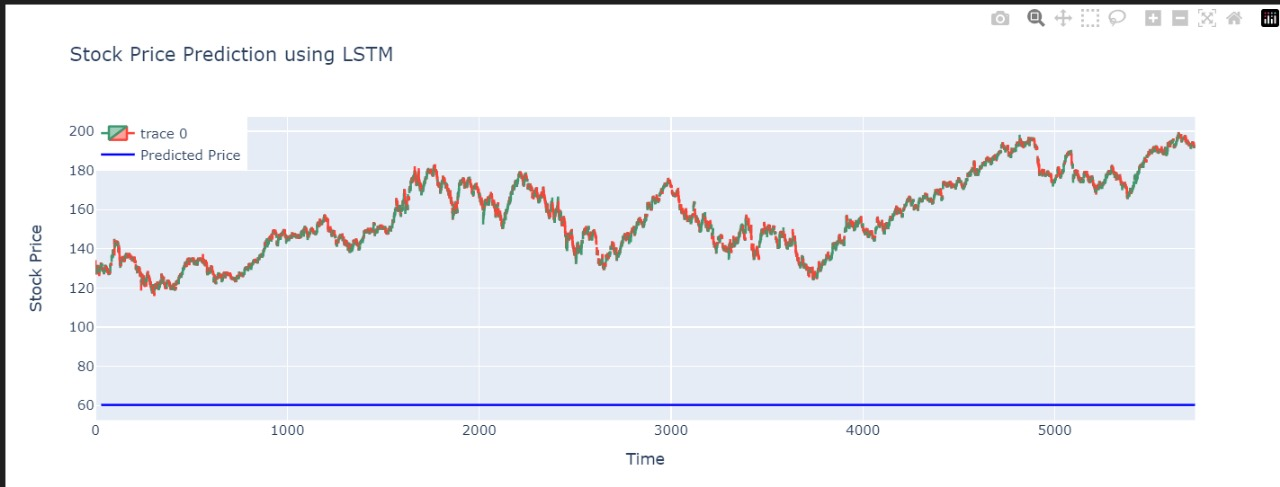

In [9]:
from PIL import Image
import requests
from IPython.display import display

url = "https://raw.githubusercontent.com/Rerris/Technical_Analysis_Proyect/main/data/test_1hr.jpeg"
response = requests.get(url, stream=True)

# Open the image in binary mode
img = Image.open(response.raw)

# Display the image within Jupyter Notebook
display(img)

Como podemos observar el modelo no se ajusta, esto se debe a que el train hace overfitting.

## Test para 5 minutos

Estos son los resultados obtenidos para el test de 5 minutos:

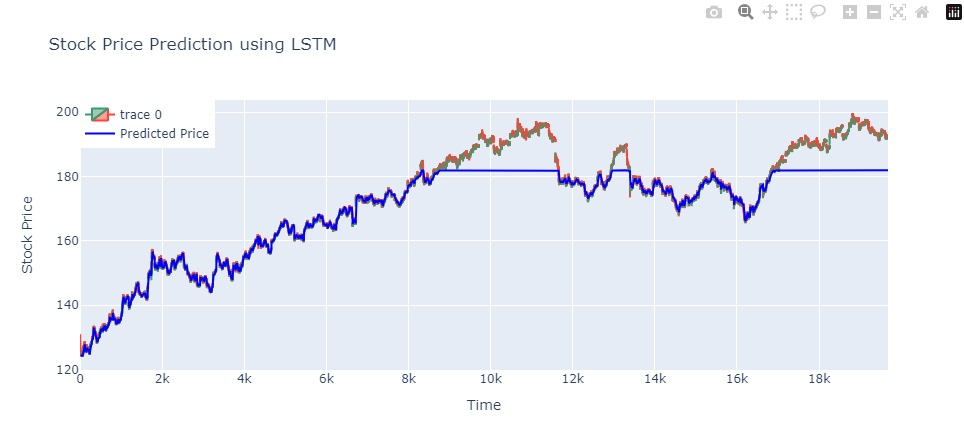

In [10]:


url = "https://raw.githubusercontent.com/Rerris/Technical_Analysis_Proyect/main/data/test_5m.jpeg"
response = requests.get(url, stream=True)

# Open the image in binary mode
img = Image.open(response.raw)

# Display the image within Jupyter Notebook
display(img)

Como podemos observar el modelo de 5 minutos si se ajusta, es importante mencionar que las líneas rectas en el gráfico se explica por la ausencia de datos de entrenamiento que representen precios superiores a dicho umbral.

## Comportamiento del portafolio para 5 minutos

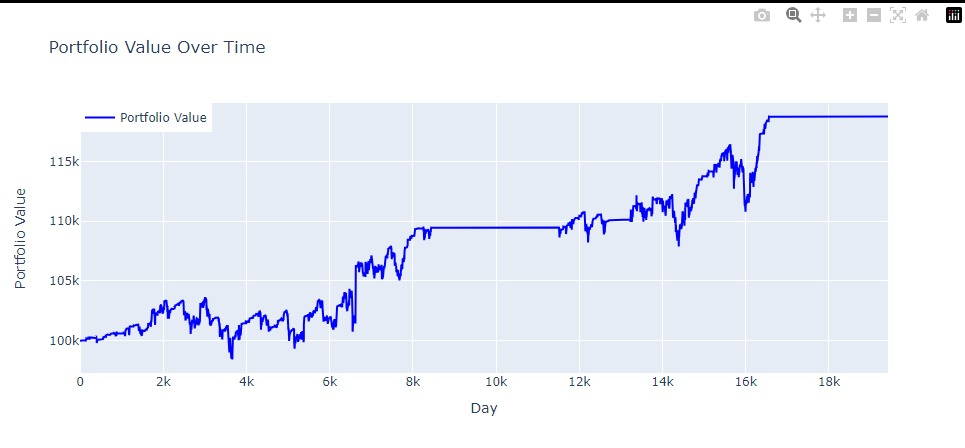

In [11]:

url = "https://raw.githubusercontent.com/Rerris/Technical_Analysis_Proyect/main/data/portafolio_5m.jpeg"
response = requests.get(url, stream=True)

# Open the image in binary mode
img = Image.open(response.raw)

# Display the image within Jupyter Notebook
display(img)

Podemos observar una tendencia creciente en el portsfolio a través del tiempo, lo cual nos indica que tendremos rendimientos positivos

## Test para 1 minuto

Estos son los resultados obtenidos para el test de 1 minuto:

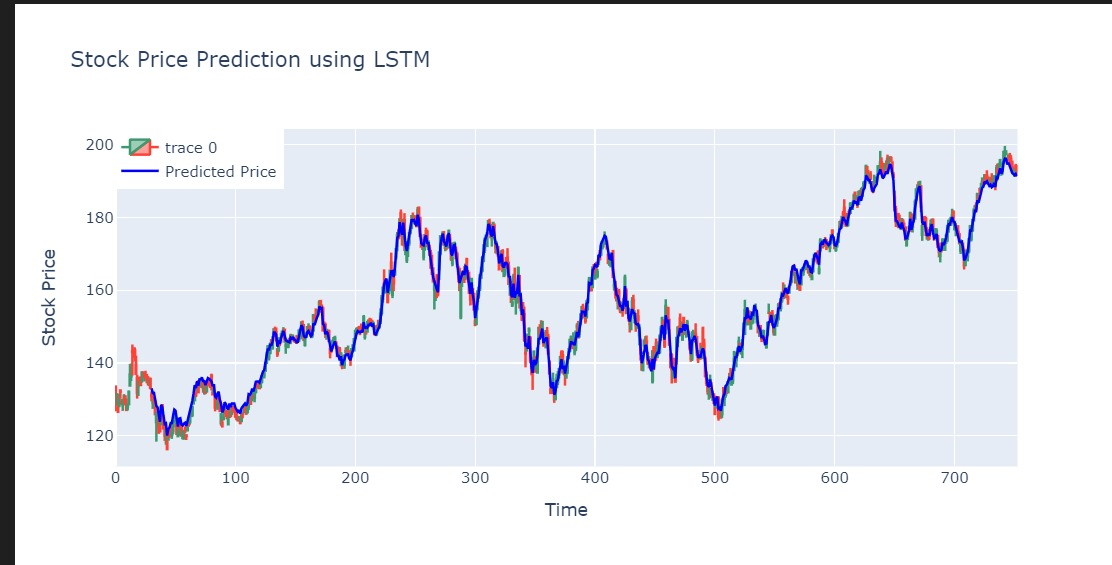

In [12]:


url = "https://raw.githubusercontent.com/Rerris/Technical_Analysis_Proyect/main/data/test_1m.jpeg"
response = requests.get(url, stream=True)

# Open the image in binary mode
img = Image.open(response.raw)

# Display the image within Jupyter Notebook
display(img)

Como podemos observar el modelo de 1 minuto se ajusta de una manera muy precisa, lo que nos puede indicar mayor precisión al predecir el comportamiento del portafolio

## Comportamiento del portafolio para 1 minuto

In [ ]:
url = "https://raw.githubusercontent.com/Rerris/Technical_Analysis_Proyect/main/data/portafolio_1m.jpeg"
response = requests.get(url, stream=True)

# Open the image in binary mode
img = Image.open(response.raw)

# Display the image within Jupyter Notebook
display(img)

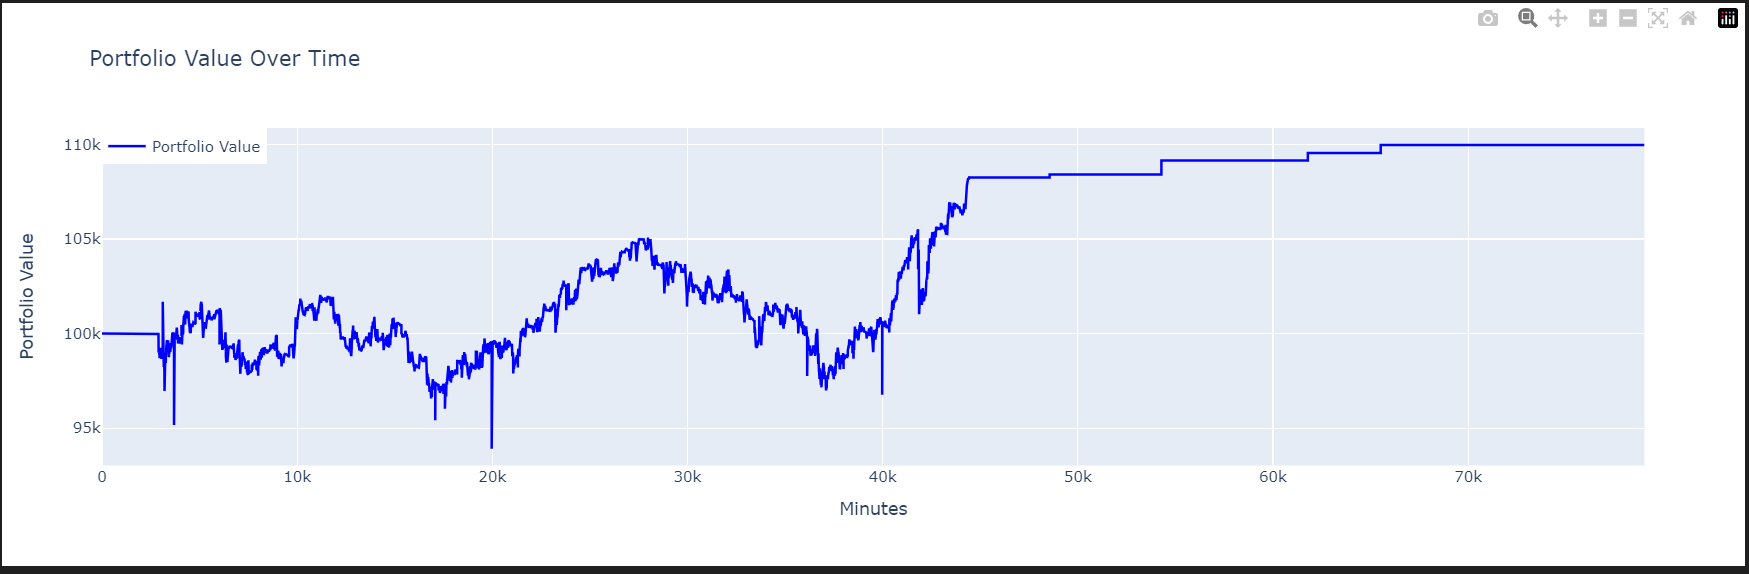

podemos observar que el comportamiento del portafolio tiene una tendencia creciente hasta que se regulariza por un periodo y nuevamente obtiene la tendencia creciente lo cual nos indica que utilizando el modelo planteado obtendremos rendimientos positivos.